In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import log
plt.rcParams['text.usetex'] = True

**Title of the experiment:**  Determing the relation between force and distance of two magnets.

**Starting date:**  11 Feb 2022
**Expected enddate:**  18 Feb 2022

**Goal of the experiment:**  In this experiment we determine the relation of the force between two magnets as function of their mutual distance. We use the set up shown below:

**Research question:**  Wat is de constante van Boltzmann?

**Expectations or Hypothesis:**  Een constante van Boltzmann.

**Desired accuracy:**  

**Assignments:**  Boltzmann

**Method:** 
Meet stroomsterkte over verschillende spanningen.
Curvefit om de onzekerheid te verkrijgen.


**Theory:**  
$$I(U) = I_0 (e^{-\frac{QU}{n k_B T}} - 1)$$

**Independent variable:**  U.


**Dependent variable:**  I.


**Controlled variables:**  Constant of Boltzmann.


**Measurement instruments \& Settings:**  


**Procedure:**  Stabilise 10 s
**Setup(drawing or picture):**  


**Notes:**  2 mV zonder spanning, instabiliteit?
**About accuracy:** 


In [58]:
R_board = [33, 100, 330, 1000, 3300, 10000, 33000]
R_actual_3_1_2 = [32.8, 103.2, 329.8, 990, 3280, 9990, 32900]
R_actual_5_1_2 = [32.206, 103.06, 329.81, 992.55, 3285.0, 9992.0, 32900]
R_board, R_actual_3_1_2, R_actual_5_1_2 = np.array(R_board), np.array(R_actual_3_1_2), np.array(R_actual_5_1_2)

print(abs(R_actual_5_1_2 - R_actual_3_1_2)/R_actual_5_1_2)

R_actual_double_5_1_2 = [32.202, 103.08, 329.72, 992.55, 3284.8, 9990.5, 32900]

[1.84437682e-02 1.35843198e-03 3.03204876e-05 2.56914009e-03
 1.52207002e-03 2.00160128e-04 0.00000000e+00]


In [59]:
V_b = 20.0
V_330_ohm_20V = 5.01
V_1000_ohm_20V = 15.02
I_1330_ohm_20V = 0.0151
I_1330_ohm_2V = 0.00141
I_1330_ohm_2V = 0.0015

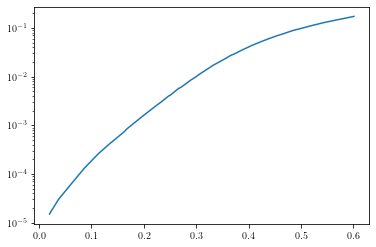

In [60]:
R = 9992
unc_R = .0005
V_b = np.array([.601, .588, .568, .554, .542, .514, .500, .486, .474, .468,
                .453, .437, .427, .406, .397, .386, .373, .366, .355, .333, 
                .307, .300, .289, .271, .266, .251, .247, .235, .223, .197, 
                .168, .162, .135, .113, .086, .060, .037, .027, .024, .020])
V_R = np.array([.1726, .1613, .1461, .1358, .1275, .10730, .09750, .08942, .08113, .07702,
                .06850, .05928, .05393, .04367, .03928, .03464, .02933, .02733, .02330, .01725, 
                .01136, .01001, .00841, .00604, .00569, .004201, .00398, .00312, .00251, .00152, 
                .00085, .00073, .00042, .00026, .00013, .00006, .00003, .00002, .000018, .000015])

unc_R_frac = 0.00015
unc_B_frac = .005
unc_V_b = unc_B_frac * V_b + 0.005 # uncertainty from datasheet + 2 digits
def digit_unc(val):
    if val > 1e-3:
        return 1e-5
    else:
        return 1e-6
    
digit_uncertainty = np.array([digit_unc(val) for val in V_R])
unc_V_R = unc_R_frac * V_R + digit_uncertainty # uncertainty from datasheet + 1 digit
plt.plot(V_b, V_R)
plt.yscale('log')

[3.589000e-05 3.419500e-05 3.191500e-05 3.037000e-05 2.912500e-05
 2.609500e-05 2.462500e-05 2.341300e-05 2.216950e-05 2.155300e-05
 2.027500e-05 1.889200e-05 1.808950e-05 1.655050e-05 1.589200e-05
 1.519600e-05 1.439950e-05 1.409950e-05 1.349500e-05 1.258750e-05
 1.170400e-05 1.150150e-05 1.126150e-05 1.090600e-05 1.085350e-05
 1.063015e-05 1.059700e-05 1.046800e-05 1.037650e-05 1.022800e-05
 1.127500e-06 1.109500e-06 1.063000e-06 1.039000e-06 1.019500e-06
 1.009000e-06 1.004500e-06 1.003000e-06 1.002700e-06 1.002250e-06]


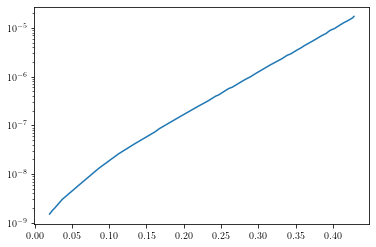

In [61]:
V_diode = V_b - V_R
I_diode = V_R / R
unc_V = ((unc_V_b) ** 2 + (unc_V_R) ** 2) ** .5
unc_I = ((unc_V_R / R) ** 2 + (V_R * unc_R * R**-1) ** 2) ** .5
print(unc_V_R)

plt.plot(V_diode, I_diode)
plt.yscale('log')
plt.show()

[2.50722042e-09 1.33422481e-23]
[0.00054151 0.00054309 0.00054564 0.00054774 0.00054971 0.00055601
 0.00056017 0.00056441 0.0005698  0.00057298 0.00058104 0.00059293
 0.00060209 0.0006274  0.00064319 0.00066516 0.00070074 0.00071844
 0.00076515 0.00088458 0.0011452  0.00125308 0.00142936 0.00187358
 0.00197191 0.00257931 0.0027091  0.00339218 0.00416419 0.0067475
 0.00141758 0.00159999 0.00257987 0.00402731 0.00785823 0.0168241
 0.03348707 0.05015249 0.0557078  0.06681854]


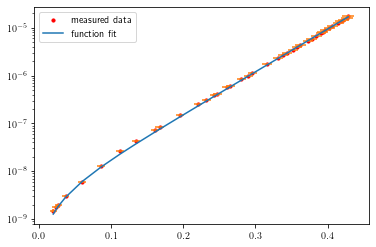

In [62]:
n = 2.0
q = -1.602e-19
kb_first_guess = 1e-23
T = 273.15 + 18.6

def f(u, I_0, kb):
    return I_0 * (np.exp(-q * u / (n * kb * T)) - 1)

popt, pcov = curve_fit(f, V_diode, I_diode, p0=[1, kb_first_guess])

print(popt)

fitted_y = f(V_diode, *popt)
print(unc_I / I_diode)
plt.errorbar(V_diode, I_diode, xerr=unc_V, yerr=unc_I, c='tab:orange', ls='None')
plt.scatter(V_diode, I_diode, label='measured data', s=10, c='r')
plt.plot(V_diode, fitted_y, label='function fit')
plt.yscale('log')
plt.legend()
plt.show()

In [63]:
# uncertainty estimation
n_unc = (2.0, .05)
q_unc = (-1.602e-19, .001)
T_unc = (273.15 + 18.6, .0003)

varbs = [n_unc, q_unc, T_unc]

# functional method: just plain better than calculus
unc = 0
for i in range(len(varbs)):
    def f(u, I_0, kb):
        return I_0 * (np.exp(-q * u / (n * kb * T)) - 1)

    n, q, T = (var[0] + var[0]*var[1]*(i==j) for j, var in enumerate(varbs))
    popt1, _ = curve_fit(f, V_diode, I_diode, p0=[1, kb_first_guess])
    
    n, q, T = (var[0] - var[0]*var[1]*(i==j) for j, var in enumerate(varbs))
    popt2, _ = curve_fit(f, V_diode, I_diode, p0=[1, kb_first_guess])
    
    unc += (popt1[1] - popt2[1])**2

print(popt[1], unc ** .5)
    

1.3342248082154288e-23 1.3378589640288772e-24


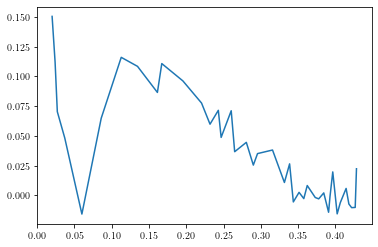

In [64]:
# Residue analyse
n = 2.0
q = -1.602e-19
kb_first_guess = 1e-23
T = 273.15 + 18.6

def f(u, I_0, kb):
    return I_0 * (np.exp(-q * u / (n * kb * T)) - 1)

popt, pcov = curve_fit(f, V_diode, I_diode, p0=[1, kb_first_guess])

I_diode_pred = f(V_diode, *popt)
plt.plot(V_diode, (I_diode - I_diode_pred) / I_diode)
plt.show()




# there does not seem to be much of a pattern in the residue, apart from a downwards trend corresponding
# to the increasing relative stability at higher voltages.




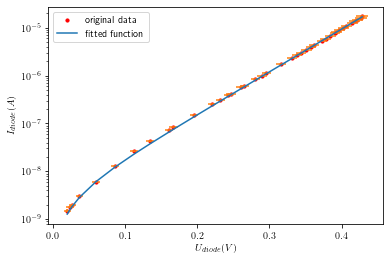

In [65]:
# estimation for ideality factor, instead of kb
q = -1.602e-19
kb = 1.38064852e-23
T = 273.15 + 18.6

def f(u, I_0, n):
    return I_0 * (np.exp(-q * u / (n * kb * T)) - 1)

popt, pcov = curve_fit(f, V_diode, I_diode)

fitted_y = f(V_diode, *popt)
plt.errorbar(V_diode, I_diode, xerr=unc_V, yerr=unc_I, c='tab:orange', ls='None')
plt.scatter(V_diode, I_diode, label='original data', s=10, c='r')
plt.plot(V_diode, fitted_y, label='fitted function')
plt.yscale('log')
plt.legend()
plt.xlabel('$U_{diode} (V)$')
plt.ylabel('$I_{diode} (A)$')
plt.show()

In [66]:
# uncertainty estimation
q_unc = (-1.602e-19, .001)
T_unc = (273.15 + 18.6, .0003)

varbs = [q_unc, T_unc]

# functional method: just plain better than calculus
# add the inaccuracy of the fit to the inaccuracy of the initial variables 
unc = np.sum(np.diag(pcov))
unc.setflags(write=1)
print(np.diag(pcov))
for i in range(len(varbs)):
    def f(u, I_0, n):
        return I_0 * (np.exp(-q * u / (n * kb * T)) - 1)

    q, T = (var[0] + var[0]*var[1]*(i==j) for j, var in enumerate(varbs))
    popt1, _ = curve_fit(f, V_diode, I_diode)
    
    q, T = (var[0] - var[0]*var[1]*(i==j) for j, var in enumerate(varbs))
    popt2, _ = curve_fit(f, V_diode, I_diode)
    
    unc += (popt1[1] - popt2[1])**2

print(popt[1], unc ** .5)

[1.21259632e-20 1.00371942e-04]
1.9327508626848333 0.010800872813174373


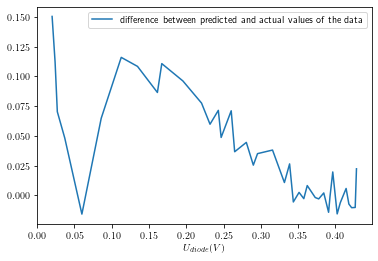

In [70]:
q = -1.602e-19
kb = 1.38064852e-23
T = 273.15 + 23.6

def f(u, I_0, n):
    return I_0 * (np.exp(-q * u / (n * kb * T)) - 1)

popt, pcov = curve_fit(f, V_diode, I_diode)

I_diode_pred = f(V_diode, *popt)
plt.plot(V_diode, (I_diode - I_diode_pred)/ I_diode, label='difference between predicted and actual values of the data')
plt.xlabel('$U_{diode} (V)$')
plt.legend()
plt.show()

# again, apart from a downwards trend by increased certainty due to increased relative precision, there does not seem to be much of a trend.

